In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Installments Payments #

In [2]:
train_data = pd.read_csv("dseb63_final_project_DP_dataset/dseb63_application_train.csv")
data = pd.read_csv("dseb63_final_project_DP_dataset/dseb63_installments_payments.csv")
data.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744758 entries, 0 to 7744757
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   NUM_INSTALMENT_VERSION  float64
 2   NUM_INSTALMENT_NUMBER   int64  
 3   DAYS_INSTALMENT         float64
 4   DAYS_ENTRY_PAYMENT      float64
 5   AMT_INSTALMENT          float64
 6   AMT_PAYMENT             float64
 7   SK_ID_CURR              float64
dtypes: float64(6), int64(2)
memory usage: 472.7 MB


In [4]:
print(f"Number of SK_ID_PREV: {data.SK_ID_PREV.unique().size}")
print(f"Number of SK_ID_CURR: {data.SK_ID_CURR.unique().size}")

Number of SK_ID_PREV: 549020
Number of SK_ID_CURR: 180734


In [5]:
data.duplicated().sum()

0

- Có khoảng 7.7M datapoints ở bảng `installments_payments`. Mỗi hàng đại diện cho từng lịch sử trả góp liên quan đến khoản vay cụ thể mà khách hàng trước đây đã có.

- Có khoảng 549k khoản vay trước đó. Trong đó có 180k khoản vay của khách hàng hiện tại có liên quan đến các khoản vay trước đó.

In [6]:
# Số lượng missing data từng cột
(data.notnull() == False).sum()

SK_ID_PREV                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        1639
AMT_INSTALMENT               1
AMT_PAYMENT               1639
SK_ID_CURR                   1
dtype: int64

In [7]:
# % lượng missing data từng cột
n_null = (data.notnull() == False).sum()
n_null / data.shape[0] * 100

SK_ID_PREV                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.021163
AMT_INSTALMENT            0.000013
AMT_PAYMENT               0.021163
SK_ID_CURR                0.000013
dtype: float64

In [18]:
nan_percentages = data.isna().sum() * 100 / len(data)
df = pd.DataFrame({'Column' : nan_percentages.index, 'Percent' : nan_percentages.values})
df.sort_values(by = 'Percent', ascending = False, inplace = True)
df

,Column,Percent
4,DAYS_ENTRY_PAYMENT,0.021163
6,AMT_PAYMENT,0.021163
5,AMT_INSTALMENT,0.000013
7,SK_ID_CURR,0.000013
0,SK_ID_PREV,0.000000
1,NUM_INSTALMENT_VERSION,0.000000
2,NUM_INSTALMENT_NUMBER,0.000000
3,DAYS_INSTALMENT,0.000000


- Có 4 cột chứa NaN là các cột: `DAYS_ENTRY_PAYMENT`,`AMT_INSTALMENT`,`AMT_PAYMENT`,`SK_ID_CURR`.

- Các cột này cũng chứa tỷ lệ giá trị NaN rất nhỏ, tức là chỉ 0,02% và 0.00001%, nên không đáng lo ngại lắm.

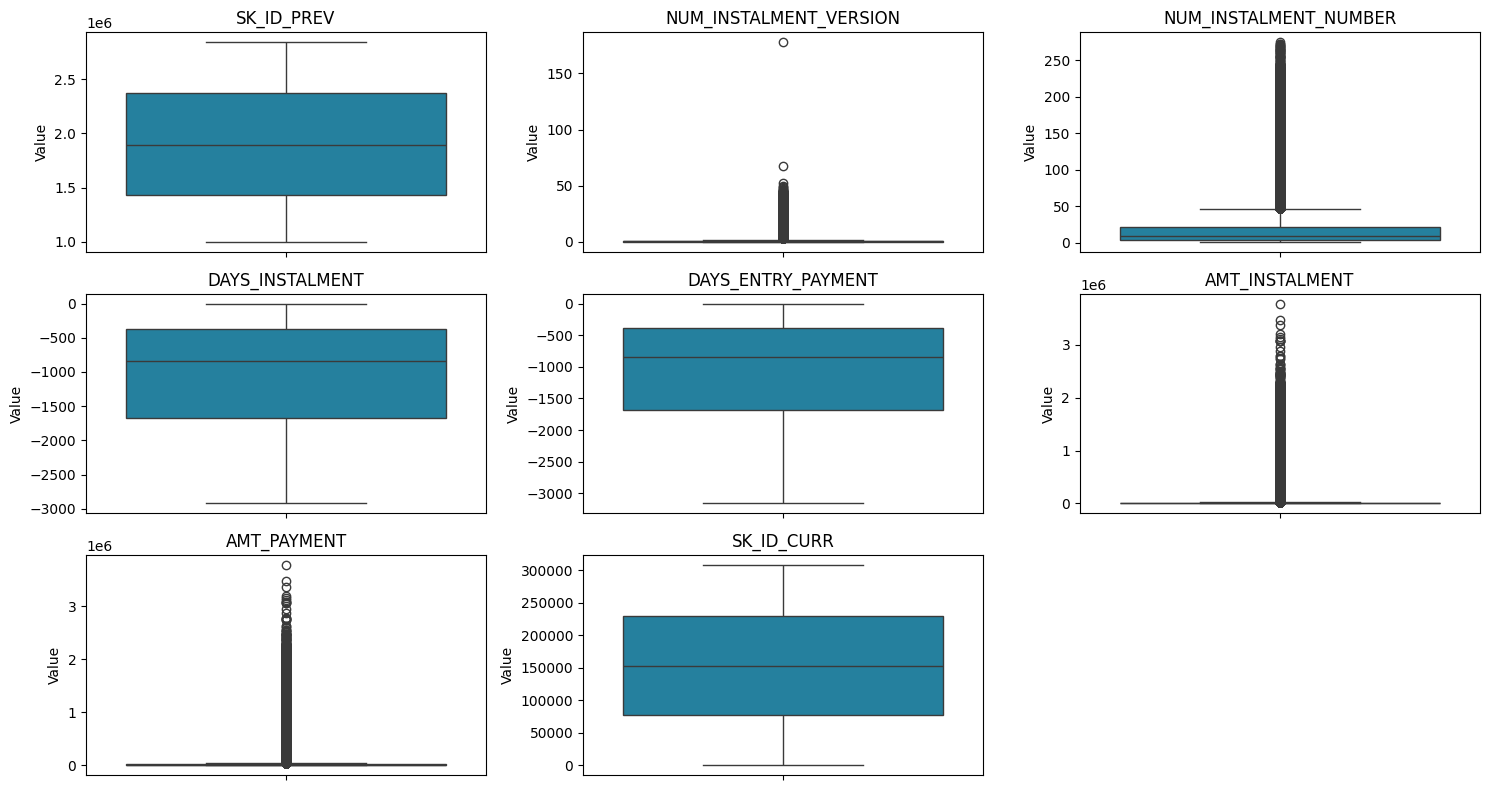

In [8]:
# Get the list of column names
features = data.columns

# Define the number of rows and columns for subplots
n_features = len(features)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Compute number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

# Plot each feature in a subplot
for i, feature in enumerate(features):
    sns.boxplot(data=data[feature], ax=axes[i], color="#118ab2")
    axes[i].set_title(feature)
    axes[i].set_xlabel("")  # Remove x-axis label for clarity
    axes[i].set_ylabel("Value")

# Remove any empty subplots (if the grid is larger than the number of features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

- Các giá trị ngoại lệ đáng kể có trong `NUM_INSTALMENT_VERSION`, `NUM_INSTALMENT_NUMBER`, `AMT_INSTALMENT` và `AMT_PAYMENT`.

- `DAYS_INSTALMENT` và `DAYS_ENTRY_PAYMENT` có phạm vi rộng nhưng không có giá trị ngoại lệ nào, cho thấy các khoản thanh toán chủ yếu được thực hiện khi gần đến hạn (ngày âm so với đơn xin vay).

- Hầu hết các khoản thanh toán thực tế `AMT_PAYMENT` đều phù hợp chặt chẽ với các đợt thanh toán theo quy định `AMT_INSTALMENT`, nhưng các trường hợp ngoại lệ có thể chỉ ra hành vi thanh toán bất thường, chẳng hạn như thanh toán quá mức hoặc thanh toán một phần.

In [9]:
numeric_df = data.drop(["SK_ID_PREV","SK_ID_CURR"], axis=1)
corr_data = numeric_df.corr()
corr_data

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
NUM_INSTALMENT_VERSION,1.000000,-0.348693,0.135285,0.133054,0.177572,0.184153
NUM_INSTALMENT_NUMBER,-0.348693,1.000000,0.101405,0.105402,-0.092901,-0.090272
DAYS_INSTALMENT,0.135285,0.101405,1.000000,0.999488,0.129735,0.130041
DAYS_ENTRY_PAYMENT,0.133054,0.105402,0.999488,1.000000,0.129269,0.129593
AMT_INSTALMENT,0.177572,-0.092901,0.129735,0.129269,1.000000,0.937035
AMT_PAYMENT,0.184153,-0.090272,0.130041,0.129593,0.937035,1.000000


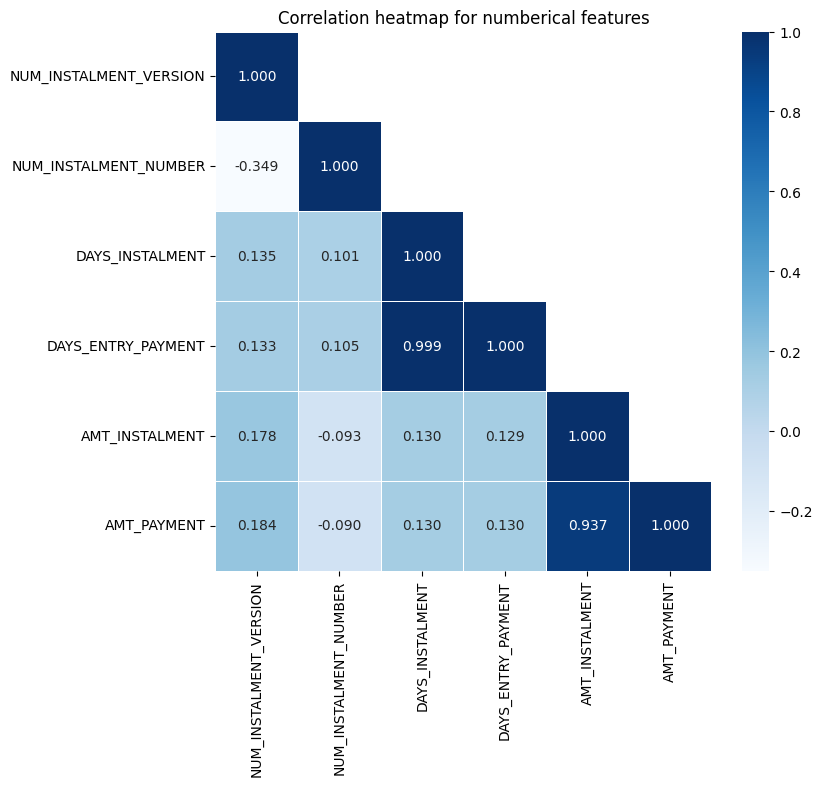

In [10]:
plt.figure(figsize=(8,7))
mask = np.zeros_like(corr_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(corr_data, mask=mask, annot=True, fmt=".3f", cmap="Blues", linewidth=0.5)
plt.title("Correlation heatmap for numberical features")
plt.show()

- Từ heatmap của ma trận tương quan, chúng ta thấy một vài tính năng có mối tương quan cao. Đó là: `AMT_INSTALMENT` và `AMT_PAYMENT`, `DAYS_INSTALMENT` và `DAYS_ENTRY_PAYMENT`. Hai tập hợp tính năng có mối tương quan này có thể hiểu được, vì chúng thực sự là các tính năng về thời điểm phải trả góp so với thời điểm đã trả và cũng là số tiền phải trả so với số tiền đã trả.

In [11]:
merged_data = pd.merge(train_data[['SK_ID_CURR','TARGET']], data, how = 'left', on=['SK_ID_CURR'])
merged_data.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,278621,0,1810518.0,1.0,2.0,-686.0,-690.0,98356.995,98356.995
1,278621,0,1810518.0,1.0,3.0,-656.0,-661.0,98356.995,98356.995
2,278621,0,2396755.0,1.0,4.0,-2220.0,-2226.0,6737.310,6737.310
3,278621,0,2396755.0,1.0,9.0,-2070.0,-2071.0,6737.310,6737.310
4,278621,0,2396755.0,1.0,5.0,-2190.0,-2199.0,6737.310,6737.310


### Continuous Vairable ###

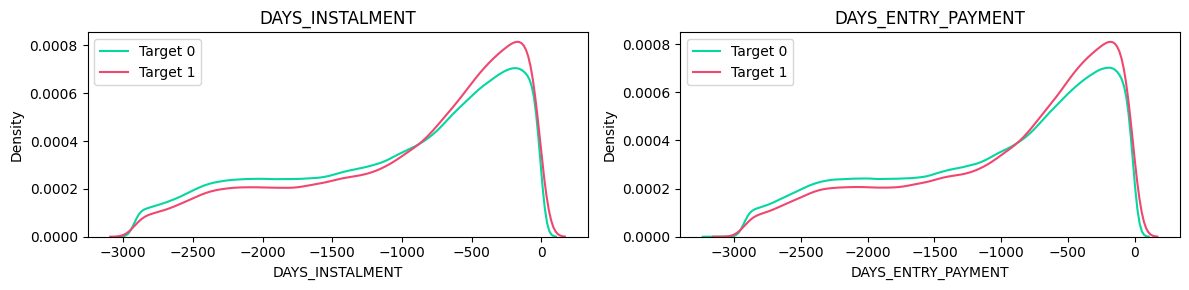

In [12]:
cols = ["DAYS_INSTALMENT","DAYS_ENTRY_PAYMENT"]

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
for i, col in enumerate(cols):
    sns.kdeplot(merged_data.loc[merged_data['TARGET'] == 0][col], label='Target 0', ax=ax[i], color="#06d6a0")
    sns.kdeplot(merged_data.loc[merged_data['TARGET'] == 1][col], label='Target 1', ax=ax[i], color="#ef476f")
    ax[i].set_title(col)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [13]:
days_instalment_data = {}
days_instalment_data[0] = merged_data.loc[merged_data['TARGET'] == 0]["DAYS_INSTALMENT"].values
days_instalment_data[1] = merged_data.loc[merged_data['TARGET'] == 1]["DAYS_INSTALMENT"].values

days_entry_payment_data = {}
days_entry_payment_data[0] = merged_data.loc[merged_data['TARGET'] == 0]["DAYS_ENTRY_PAYMENT"].values
days_entry_payment_data[1] = merged_data.loc[merged_data['TARGET'] == 1]["DAYS_ENTRY_PAYMENT"].values

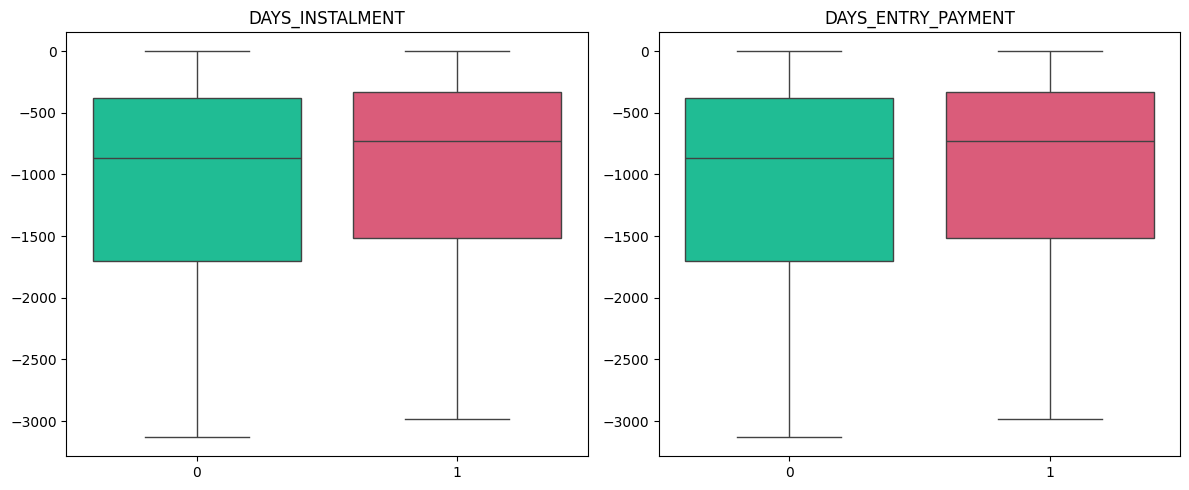

In [14]:
list_data = [days_instalment_data,days_entry_payment_data]
palette_color = {0:"#06d6a0", 1:"#ef476f"}

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i in range(2):
    sns.boxplot(list_data[1], palette=palette_color, ax=ax[i])
    ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

1. `DAYS_INSTALMENT`: Phân phối cho cả MỤC TIÊU 0 và MỤC TIÊU 1 đều có hình dạng tương tự nhưng có một chút thay đổi:
    - Đối với MỤC TIÊU 1, đỉnh của đường cong mật độ sớm hơn một chút (ít giá trị âm hơn).
    - Điều này cho thấy khách hàng gặp khó khăn trong việc trả nợ có xu hướng lên lịch trả góp gần với ngày nộp đơn xin vay hơn, có thể phản ánh thời hạn vay ngắn hơn hoặc tính cấp thiết cao hơn trong việc thanh toán.

2. `DAYS_ENTRY_PAYMENT`: Đường cong TARGET 1 cho thấy đỉnh rõ rệt hơn gần 0 so với TARGET 0.
    - Điều này cho thấy khách hàng gặp khó khăn trong việc trả nợ có xu hướng thanh toán gần ngày đến hạn hoặc chậm thanh toán.
    - Khách hàng TARGET 0 thể hiện sự phân phối rộng hơn, điều này có thể ngụ ý sự ổn định tài chính tốt hơn để thanh toán sớm hơn hoặc muộn hơn mà không bị vỡ nợ.

=> Chúng ta có thể thấy một mô hình tương tự, trong đó Người vỡ nợ có xu hướng có ít ngày hơn kể từ lần thanh toán cuối cùng của họ, trong khi Người không vỡ nợ có nhiều ngày hơn kể từ lần thanh toán cuối cùng của họ. Tất cả các phân vị của Người vỡ nợ đều có nhiều ngày gần đây hơn so với những người không vỡ nợ. Do đó, Người không vỡ nợ thường có nhiều khoảng cách hơn trong các khoản thanh toán của họ kể từ ngày nộp đơn so với Người vỡ nợ.

# POS Cash Balance #

In [15]:
data = pd.read_csv("dseb63_final_project_DP_dataset\dseb63_POS_CASH_balance.csv")
data.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


In [17]:
data.duplicated().sum()

0

In [18]:
print(f"Number of SK_ID_PREV: {data.SK_ID_PREV.unique().size}")
print(f"Number of SK_ID_CURR: {data.SK_ID_CURR.unique().size}")

Number of SK_ID_PREV: 800337
Number of SK_ID_CURR: 289444


- Có khoảng 8.5M datapoints ở bảng `POS Cash Balance`. Trong đó mỗi hàng tương ứng với ảnh chụp nhanh hàng tháng về trạng thái của POS và Khoản vay tiền mặt trước đó mà khách hàng đã có.

- Có khoảng 800k khoản vay trước đó. Trong đó có 289k khoản vay của khách hàng hiện tại có liên quan đến các khoản vay trước đó.

In [19]:
# Số lượng missing data từng cột
(data.notnull() == False).sum()

SK_ID_PREV                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           21863
CNT_INSTALMENT_FUTURE    21878
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
SK_ID_CURR                   0
dtype: int64

In [20]:
# % lượng missing data từng cột
n_null = (data.notnull() == False).sum()
n_null / data.shape[0] * 100

SK_ID_PREV               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.255906
CNT_INSTALMENT_FUTURE    0.256081
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
SK_ID_CURR               0.000000
dtype: float64

- Chỉ có 2 cột chứa giá trị NaN của 8 cột từ `POS_CASH_balance`. Các cột này là `CNT_INSTALMENT` và `CNT_INSTALMENT_FUTURE`.

- Các cột này cũng chứa tỷ lệ giá trị NaN rất nhỏ, tức là chỉ 0,25%, vì vậy cũng không đáng lo ngại lắm.

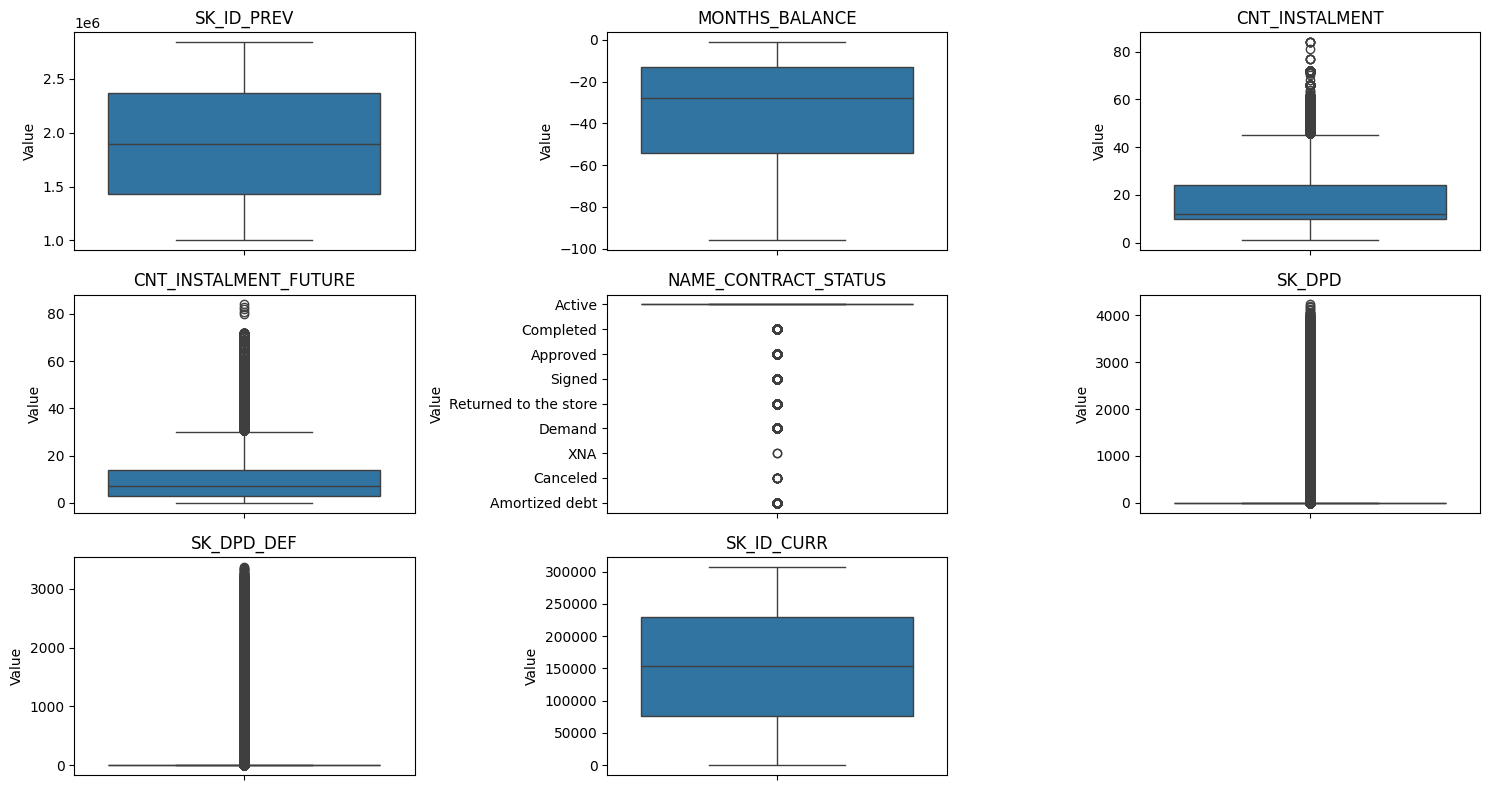

In [ ]:
# Get the list of column names
features = data.columns

# Define the number of rows and columns for subplots
n_features = len(features)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Compute number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

# Plot each feature in a subplot
for i, feature in enumerate(features):
    sns.boxplot(data=data[feature], ax=axes[i], color="#118ab2")
    axes[i].set_title(feature)
    axes[i].set_xlabel("")  # Remove x-axis label for clarity
    axes[i].set_ylabel("Value")

# Remove any empty subplots (if the grid is larger than the number of features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

- Phần lớn khách hàng duy trì trạng thái thanh toán tốt với ít ngày quá hạn `SK_DPD` hoặc vi phạm nghiêm trọng `SK_DPD_DEF`.

- Trạng thái hợp đồng `NAME_CONTRACT_STATUS` cung cấp thông tin phân loại rõ ràng, có thể dùng để phân nhóm và đánh giá hành vi tín dụng.

In [23]:
numeric_df = data.drop(["SK_ID_PREV","SK_ID_CURR"], axis=1)._get_numeric_data()
corr_data = numeric_df.corr()
corr_data

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
MONTHS_BALANCE,1.000000,0.340099,0.277634,-0.017702,-0.000859
CNT_INSTALMENT,0.340099,1.000000,0.873742,-0.061455,-0.013403
CNT_INSTALMENT_FUTURE,0.277634,0.873742,1.000000,-0.082890,-0.016427
SK_DPD,-0.017702,-0.061455,-0.082890,1.000000,0.225918
SK_DPD_DEF,-0.000859,-0.013403,-0.016427,0.225918,1.000000


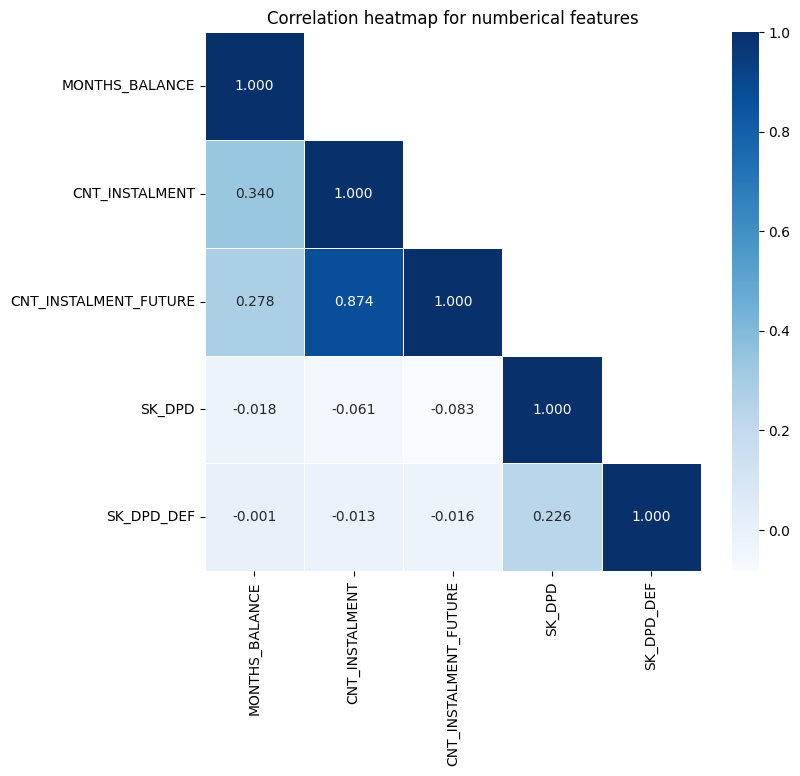

In [24]:
plt.figure(figsize=(8,7))
mask = np.zeros_like(corr_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(corr_data, mask=mask, annot=True, fmt=".3f", cmap="Blues", linewidth=0.5)
plt.title("Correlation heatmap for numberical features")
plt.show()

In [25]:
merged_data = pd.merge(train_data[['SK_ID_CURR','TARGET']], data, how = 'left', on=['SK_ID_CURR'])
merged_data.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,278621,0,2396755.0,-66.0,12.0,1.0,Active,0.0,0.0
1,278621,0,2636178.0,-23.0,6.0,1.0,Active,0.0,0.0
2,278621,0,1810518.0,-23.0,12.0,10.0,Active,0.0,0.0
3,278621,0,1810518.0,-25.0,12.0,12.0,Active,0.0,0.0
4,278621,0,2396755.0,-67.0,12.0,2.0,Active,0.0,0.0


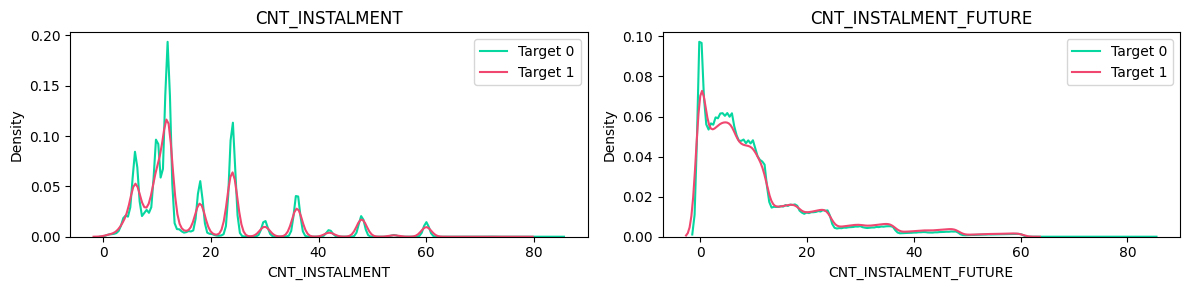

In [26]:
cols = ["CNT_INSTALMENT","CNT_INSTALMENT_FUTURE"]

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
for i, col in enumerate(cols):
    sns.kdeplot(merged_data.loc[merged_data['TARGET'] == 0][col], label='Target 0', ax=ax[i], color="#06d6a0")
    sns.kdeplot(merged_data.loc[merged_data['TARGET'] == 1][col], label='Target 1', ax=ax[i], color="#ef476f")
    ax[i].set_title(col)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [27]:
CNT = {}
CNT[0] = merged_data.loc[merged_data['TARGET'] == 0]["CNT_INSTALMENT"].values
CNT[1] = merged_data.loc[merged_data['TARGET'] == 1]["CNT_INSTALMENT"].values

CNT_future = {}
CNT_future[0] = merged_data.loc[merged_data['TARGET'] == 0]["CNT_INSTALMENT_FUTURE"].values
CNT_future[1] = merged_data.loc[merged_data['TARGET'] == 1]["CNT_INSTALMENT_FUTURE"].values

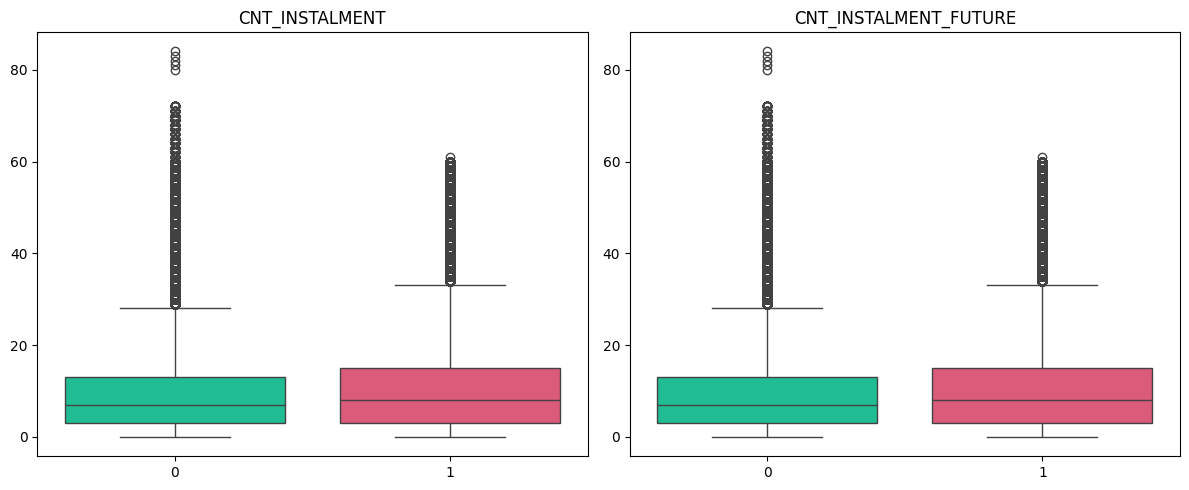

In [28]:
list_data = [CNT,CNT_future]
palette_color = {0:"#06d6a0", 1:"#ef476f"}

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i in range(2):
    sns.boxplot(list_data[1], palette=palette_color, ax=ax[i])
    ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

- Không có sự khác biệt đáng kể trong phân phối giá trị của `CNT_INSTALMENT` và `CNT_INSTALMENT_FUTURE` giữa hai nhóm TARGET. => Điều này cho thấy hai biến này có thể không phải là yếu tố quan trọng để phân biệt khách hàng gặp vấn đề tín dụng (TARGET = 1) và khách hàng không gặp vấn đề tín dụng (TARGET = 0).

- Nhìn vào biểu đồ hộp ở trên cho `CNT_INSTALMENT_FUTURE`, chúng ta thấy rằng các giá trị phần trăm > 50% đối với Người vỡ nợ thường cao hơn so với Người không vỡ nợ. Ngay cả râu giới hạn trên đối với Người vỡ nợ cũng cao hơn râu của Người không vỡ nợ. Điều này cho thấy Người vỡ nợ có xu hướng có nhiều Khoản trả góp còn lại hơn trong các khoản tín dụng trước đó của họ so với Người không vỡ nợ.

- Hành động tiếp theo:
    - Kiểm tra mối quan hệ phi tuyến tính giữa các biến này và `TARGET` (nếu có). Ví dụ: tạo thêm các đặc trưng (feature engineering) như `CNT_INSTALMENT` / `CNT_INSTALMENT_FUTURE`, hoặc kiểm tra kết hợp với các biến khác.
    - Xem xét giữ lại hai biến này, nhưng chúng có thể không nằm trong danh sách các biến quan trọng (low feature importance) trong mô hình dự đoán.

### Categorial Feature ###

In [22]:
data["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
Active                   7818577
Completed                 634872
Signed                     74625
Demand                      6110
Returned to the store       4591
Approved                    4221
Amortized debt               365
Canceled                      12
XNA                            2
Name: count, dtype: int64

In [33]:
data["NAME_CONTRACT_STATUS"].value_counts() / data["NAME_CONTRACT_STATUS"].value_counts().sum() * 100

NAME_CONTRACT_STATUS
Active                   91.516257
Completed                 7.431162
Signed                    0.873484
Demand                    0.071517
Returned to the store     0.053738
Approved                  0.049407
Amortized debt            0.004272
Canceled                  0.000140
XNA                       0.000023
Name: count, dtype: float64

Khi xét các nhóm CATEGORY trong cột `NAME_CONTRACT_STATUS` thì nhóm `Active` là chiếm chủ yếu (Lên tới hơn 90%), xếp sau là `Completed` (với hơn 7%) và `Signed` (với 0.8%). Các nhóm còn lại có tỉ lệ phân trăm là rất thấp vì vậy ta nên tập trung vào 3 nhóm trên.

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

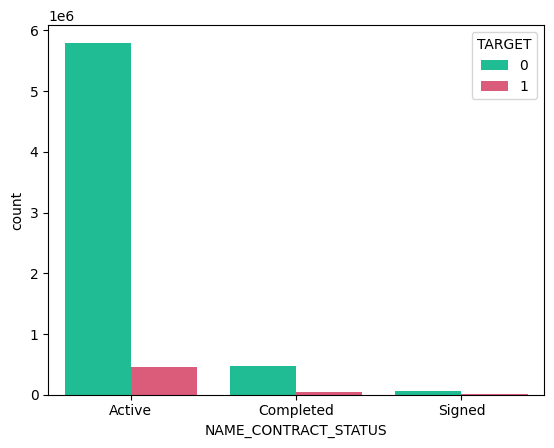

In [37]:
sns.countplot(x='NAME_CONTRACT_STATUS', hue='TARGET', data=merged_data[merged_data["NAME_CONTRACT_STATUS"].isin(["Active","Completed","Signed"])], palette={0:"#06d6a0", 1:"#ef476f"})